**1. Data Exploration**

In [2]:
import numpy as np
import pandas as pd

def generate_synthetic_data(num_samples, num_features):
    # Generate random data with normal distribution
    X = np.random.normal(size=(num_samples, num_features))

    # Generate target variable y with a linear combination of a subset of features plus noise
    relevant_features = np.random.choice(num_features, size=int(num_features/2), replace=False)
    w = np.zeros(num_features)
    w[relevant_features] = np.random.normal(size=(len(relevant_features),))
    noise = np.random.normal(scale=0.1, size=(num_samples,))
    y = X[:, relevant_features].dot(w[relevant_features]) + noise

    # Introduce missing values in the data
    missing = np.random.choice(num_samples * num_features, size=int(num_samples * num_features * 0.1), replace=False)
    X.flat[missing] = np.nan

    return X, y

num_samples = 1000
num_features = 5
X, y = generate_synthetic_data(num_samples, num_features)

In [7]:
# Create a Pandas DataFrame from the NumPy array X, Y
df = pd.DataFrame(np.column_stack((X, y)), columns=[f'Feature_{i}' for i in range(X.shape[1])] + ['Target'])
df['Target'] = y


In [8]:
# Showing 5 first rows
print
print(df.head())

   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4    Target
0  -2.010862   1.728462  -0.109330   1.246457  -1.369269  4.036217
1  -0.904719  -1.060665   0.210119   1.091611   2.157442 -0.436478
2        NaN        NaN   0.471060  -1.039345  -0.834359  2.813345
3   1.340622  -1.563044   1.268512  -0.352526  -1.910729 -3.407695
4  -0.560524   1.630291   1.057709   0.655577   0.010160  2.461399


In [9]:
# Missing values per column
print("\nPrint Missig Values :")
print(df.isnull().sum())


Print Missig Values :
Feature_0    111
Feature_1     94
Feature_2     94
Feature_3     95
Feature_4    106
Target         0
dtype: int64


In [10]:
# Statistical summary of the data
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
        Feature_0   Feature_1   Feature_2   Feature_3   Feature_4       Target
count  889.000000  906.000000  906.000000  905.000000  894.000000  1000.000000
mean     0.010036   -0.000641   -0.029158   -0.044343    0.010682     0.002967
std      1.025402    1.003979    1.026616    1.023046    1.037467     1.572761
min     -3.285880   -3.408561   -3.036086   -3.183873   -3.012392    -4.610926
25%     -0.663104   -0.711490   -0.701769   -0.740779   -0.700072    -0.996426
50%     -0.060385    0.043308   -0.017241   -0.064060   -0.028327     0.065597
75%      0.706366    0.689464    0.643069    0.655577    0.733378     1.029931
max      2.997466    3.061219    2.926684    4.282287    3.429150     5.298435


**2. Handling Missing Values**

In [11]:
# Missing values filled with median
df.fillna(df.median(), inplace=True)

In [12]:
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Feature_0    0
Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
Target       0
dtype: int64


**3. Dimensionality reduction**

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [14]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['Target']))  # Exclude the target variable

In [15]:
# Apply PCA to reduce dimensions (keeping 95% of variance)
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

In [18]:
# Explained variance ratio
print("\nExplained variance ratio by each principal component:")
print(pca.explained_variance_ratio_)



Explained variance ratio by each principal component:
[0.22064228 0.20493289 0.19778783 0.19517032 0.18146668]


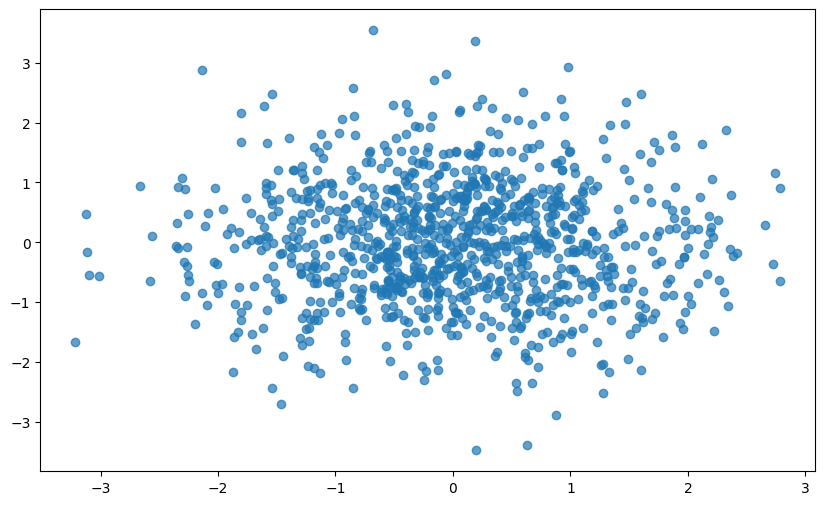

In [17]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)

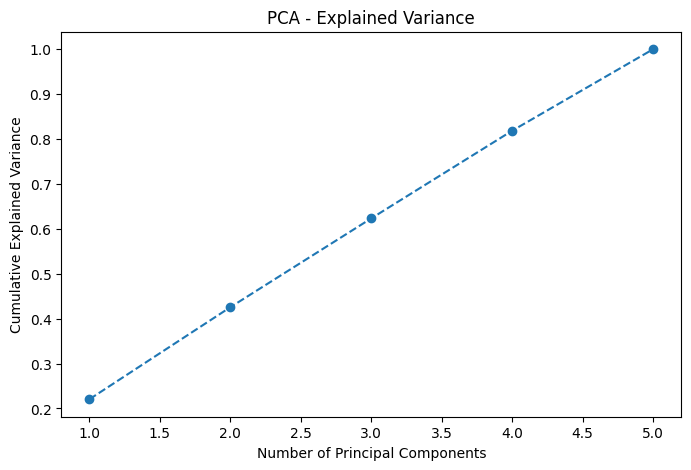

In [19]:
# Plot cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.show()

**4. Supervised Machine Learning**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca, df['Target'], test_size=0.2, random_state=42)

In [23]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR()
}

In [24]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Compute evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "R² Score": r2}
    print(f"\n{name} - MSE: {mse:.4f}, R² Score: {r2:.4f}")


Linear Regression - MSE: 0.2824, R² Score: 0.8758

Decision Tree - MSE: 0.9978, R² Score: 0.5614

Random Forest - MSE: 0.3846, R² Score: 0.8309

Support Vector Machine - MSE: 0.3243, R² Score: 0.8574


# **Results**

* Linear Regression : This model performs well. The data likely has a linear relationship between features and the target.

* Support Vector Machine Also performs well.

* Random Forest Decent performance but slightly worse than the first two.

* Decision Tree is the worst performer in this dataset. It might be overfitting or not deep enough to learn the patterns.

**5. Visualising predictions to understand model accuracy.**

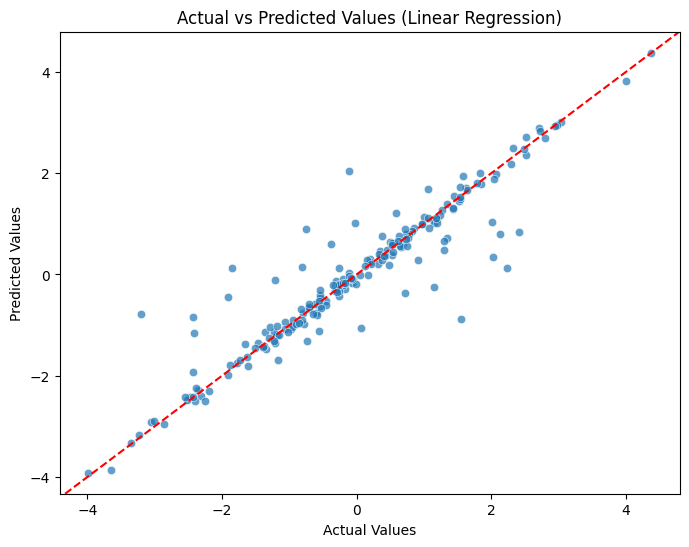

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train the best model again
from sklearn.linear_model import LinearRegression
best_model = LinearRegression()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.axline((0,0), slope=1, color="red", linestyle="--")  # Reference line
plt.show()


# **6. Conclusion and steps used**

In conclusion, the best models are Linear regression and Support Vector Machine in this dataset because they have the highest R² scores closest to 1 and the lowest MSE

Steps :
1. Generated and cleaned the data (handling missing values).
2. Reduced dimensions using PCA for better efficiency.
3. Trained multiple machine learning models to see which one works best.
4. Compared performance using Mean Squared Error (MSE) and R² Score.
5. Visualized predictions to understand model accuracy.
